# Load and View Data

In [ ]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 

In [31]:
path = '/kaggle/input/flood-datasets/2025-sum-dpl-302-m/'
os.listdir(path)

['train_images', 'train.csv', 'test.csv', 'tests_images']

In [34]:
train_csv = pd.read_csv(r'/kaggle/input/flood-datasets/2025-sum-dpl-302-m/train.csv')
train_images = "/kaggle/input/flood-datasets/2025-sum-dpl-302-m/train_images"


In [35]:
train_csv.head()

,id,label
0,3519864665,0
1,4896119055,0
2,3468473862,0
3,4120853942,0
4,4436083254,0


In [36]:
train_csv.tail()

,id,label
5275,8119782888,0
5276,6093294301,1
5277,6791185487,0
5278,9144682941,0
5279,596012254,0


In [37]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      5280 non-null   int64
 1   label   5280 non-null   int64
dtypes: int64(2)
memory usage: 82.6 KB


In [38]:
print(train_csv['label'].value_counts())

label
0    3360
1    1920
Name: count, dtype: int64


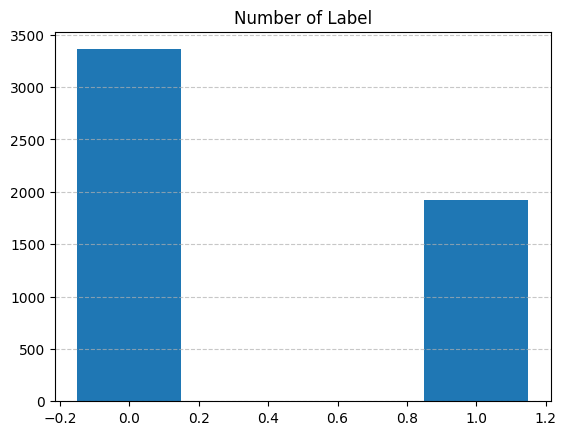

In [39]:
label = train_csv['label']
counts = label.value_counts()

plt.bar(counts.index, counts.values, width=0.3)
plt.title('Number of Label')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [58]:
valid_exts = ('.jpg', '.jpeg', '.png', 'gif')
train_files = set([
    f for f in os.listdir(train_images)
    if f.lower().endswith(valid_exts) and not f.startswith("._")
])

print(f"Total number of valid image files: {len(train_files)}")


image_ids = set(os.path.splitext(f)[0] for f in train_files)
label_ids = set(train_csv['id'].astype(str))
unlabeled_ids = image_ids - label_ids

print(f"Some photos without labels: {len(unlabeled_ids)}")


Total number of valid image files: 5280
Some photos without labels: 0


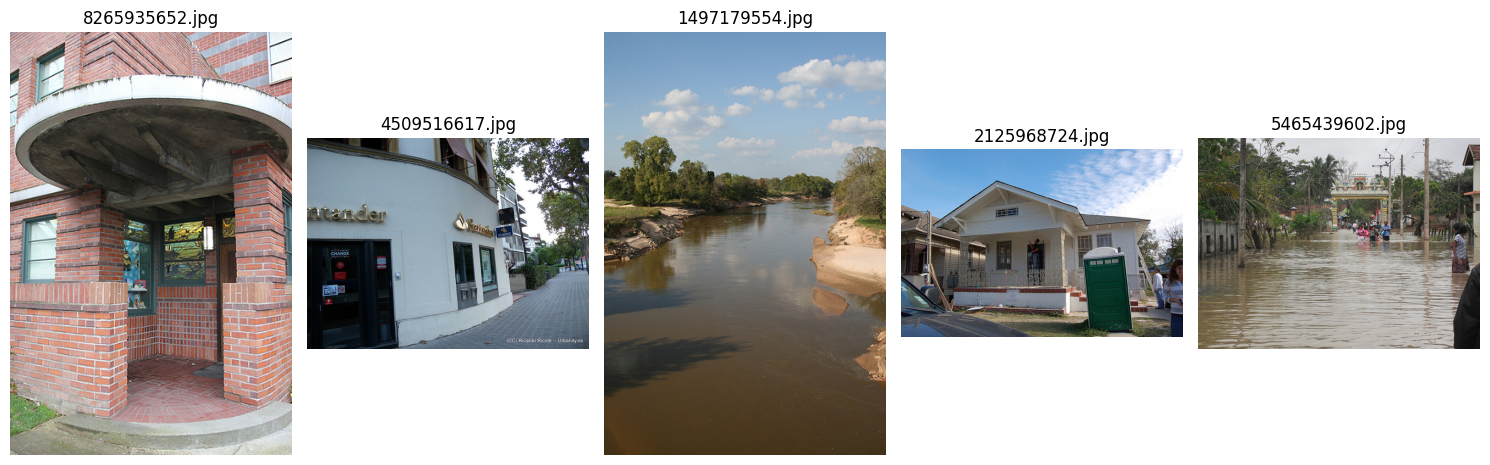

In [52]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

sample_files = random.sample(image_files, 5)

plt.figure(figsize=(15, 5))
for i, file in enumerate(sample_files):
    image_path = os.path.join(train_images, file)
    img = Image.open(image_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(file)

plt.tight_layout()
plt.show()

In [59]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

IMG_SIZE = (128, 128)

id_to_label = dict(zip(train_csv['id'].astype(str), train_csv['label']))

labeled_files = [f for f in train_files if os.path.splitext(f)[0] in id_to_label]

X = []
y = []

for file in tqdm(labeled_files):
    img_id = os.path.splitext(file)[0]
    label = id_to_label[img_id]
    
    img_path = os.path.join(train_images, file)
    img = Image.open(img_path).convert('RGB')
    img = img.resize(IMG_SIZE)
    img_array = np.array(img) / 255.0  #
    X.append(img_array)
    y.append(label)


100%|██████████| 5280/5280 [00:27<00:00, 189.54it/s]


In [67]:
print(f"Numbers of X: {len(X)}")
print(f"Number of y: {len(y)}")
print(f"Size image: {np.array(X[34]).shape}")


Numbers of X: 5280
Number of y: 5280
Size image: (128, 128, 3)


In [81]:
from sklearn.model_selection import train_test_split

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [116]:
print(f"Numbers of X_train: {len(X_train)}")
print(f"Number of y_train: {len(y_train)}")
print(f"Numbers of X_test: {len(X_test)}")
print(f"Number of y_test: {len(y_test)}")

Numbers of X_train: 4224
Number of y_train: 4224
Numbers of X_test: 1056
Number of y_test: 1056


# Train model

In [ ]:
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [122]:
model.fit(X_train, y_train, epochs=10, batch_size=32,validation_split=0.2)


Epoch 1/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9771 - loss: 0.0606 - val_accuracy: 0.7503 - val_loss: 1.3812
Epoch 2/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9918 - loss: 0.0233 - val_accuracy: 0.8012 - val_loss: 1.1423
Epoch 3/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9830 - loss: 0.0484 - val_accuracy: 0.7893 - val_loss: 1.0213
Epoch 4/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.7586 - val_loss: 1.1414
Epoch 5/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9930 - loss: 0.0182 - val_accuracy: 0.7905 - val_loss: 1.2534
Epoch 6/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9885 - loss: 0.0291 - val_accuracy: 0.7728 - val_loss: 1.4767
Epoch 7/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9941 - loss: 0.0250 - val_accuracy: 0.7728 - val_loss: 1.4024
Epoch 8/10
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9946 - loss: 0.0134 - val_accu

# Test model

In [128]:
model.evaluate(X_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8287 - loss: 1.2792


[1.5170421600341797, 0.8039772510528564]

In [129]:
model.save('flood_model.h5')

In [130]:
from IPython.display import FileLink
FileLink("flood_model.h5")


/kaggle/working/flood_model.h5

In [135]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

model = tf.keras.models.load_model("/kaggle/working/flood_model.h5")

IMG_SIZE = (128, 128)

def predict_flood(image):
    # Resize and normalize the image
    image = image.resize(IMG_SIZE).convert("RGB")
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Predict using the model
    prediction = model.predict(image_array)[0][0]
    label = "Flood Detected" if prediction >= 0.5 else "No Flood"
    confidence = float(prediction) if prediction >= 0.5 else 1 - float(prediction)
    
    return f"{label} (Confidence: {confidence:.2%})"

app = gr.Interface(
    fn=predict_flood,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Flood Detection from Image",
    description="Upload an image and the model will predict whether there is flooding or not."
)

app.launch()


* Running on local URL:  http://127.0.0.1:7863
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://49a979603a1b3f81f6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
